In [1]:
import pandas as pd

In [7]:
data_fy=pd.read_csv("FY2020.csv")

In [8]:
data_fy.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [18]:
len(data_fy["Company Name"].value_counts(dropna='True')) #1st way with value_counts

439

In [17]:
len(pd.unique(data_fy["Company Name"])) #2nd way with unique

439

In [27]:
total_jobs=data_fy.groupby(['City'])['Job created'].sum()
print(total_jobs['Queens'])

90.0


In [22]:
data_fy.describe()

,Postcode,Current fulltime,Job created,Job retain,Total Savings,Savings from beginning receiving benefits,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,450.000000,446.000000,11.000000,14.000000,4.500000e+02,4.500000e+02,409.000000,409.000000,409.000000,409.000000,409.000000,4.010000e+02,4.010000e+02
mean,11024.124444,124.186099,13.545455,297.500000,3.943778e+04,4.234601e+05,40.722293,-73.942376,317.982885,27.823961,2049.080685,3.295894e+06,3.163398e+09
std,405.126704,392.750810,16.409532,778.404655,1.345949e+05,1.936066e+06,0.057503,0.065553,93.925749,10.984316,7784.674799,9.897776e+05,9.483943e+08
min,10001.000000,0.000000,2.000000,4.000000,-1.099101e+05,0.000000e+00,40.555080,-74.216206,101.000000,1.000000,1.000000,1.000811e+06,1.000220e+09
25%,11101.000000,11.000000,4.000000,15.500000,1.770948e+03,1.498421e+04,40.676351,-73.984843,301.000000,26.000000,20.000000,3.009889e+06,3.006320e+09
50%,11205.000000,28.000000,10.000000,42.000000,6.101215e+03,5.431184e+04,40.721144,-73.941706,307.000000,30.000000,199.000000,3.336903e+06,3.036760e+09
75%,11232.000000,76.000000,13.500000,160.750000,2.025603e+04,2.003667e+05,40.752096,-73.909345,402.000000,36.000000,543.000000,4.005076e+06,4.003930e+09
max,11693.000000,3878.000000,60.000000,2964.000000,1.568982e+06,3.351826e+07,40.890837,-73.743730,503.000000,51.000000,94201.000000,5.168823e+06,5.070670e+09


In [30]:
emails=data_fy['company email'].str.split("@").str.get(1)
print(len(emails.value_counts(dropna='True')))

356


In [47]:
data_fy['NTA_check']=data_fy['NTA'].map(data_fy['NTA'].value_counts(dropna=True)>4)

In [51]:
data_fy_new=data_fy[data_fy['NTA_check']==True]

In [62]:
final_5=data_fy_new.groupby(['NTA']).agg({'Job created':'sum','Total Savings':'mean'})

In [63]:
final_5.to_csv('pandas_ans_5.csv')

Text(0.5, 1.0, 'Log')

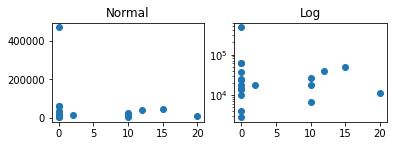

In [79]:
#Day 5 Assignments
import matplotlib.pyplot as plt
import numpy as np
x=final_5['Job created']
y=final_5['Total Savings']
plt.subplot(221)
plt.scatter(x,y)
plt.title('Normal')

plt.subplot(222)
plt.scatter(x,y)
plt.yscale('log')
plt.title('Log')

(array([2., 1., 2., 6., 3., 4., 1., 0., 0., 1.]),
 array([ 7.92330797,  8.43700273,  8.95069749,  9.46439226,  9.97808702,
        10.49178178, 11.00547655, 11.51917131, 12.03286607, 12.54656084,
        13.0602556 ]),
 <a list of 10 Patch objects>)

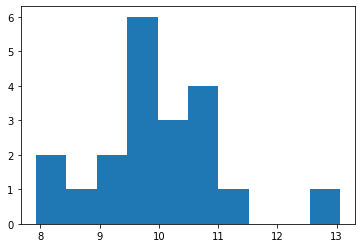

In [80]:
plt.hist(np.log(y))

In [82]:
data_fy['Effective Date']=pd.to_datetime(data_fy['Effective Date'])
monthly_jobs=data_fy.groupby(data_fy['Effective Date'].dt.month)['Job created'].sum()

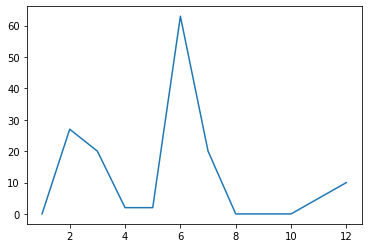

In [83]:
plt.plot(monthly_jobs)